In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# The goal is to have Vespa app that does result distillation: first put 10 hits with one ranking signal then 10 with the other.
# Implement that with a global-phase RRF
# An extra is to show how blending with RRF looks visually: 0 for f1 X for f2.
# Draw a grid of 50 x 50 and fill with results.

In [1]:
def rrf(rank, k):
    return 1 / (rank + k)

In [73]:
f1 = range(1, 100)
f2 = range(1, 10)

f1_rrf = [('0', rrf(rank, 10)) for rank in f1]
f2_rrf = [('X', rrf(rank, 2) * rrf(rank, 2)) for rank in f2] # very interesting take
final = sorted(f1_rrf + f2_rrf, key=lambda x: x[1], reverse=True)

def chunk(lst, size):
    return [lst[i:i + size] for i in range(0, len(lst), size)]

def make_red(s):
    if s != 'X':
        return s
    return '\033[91m' + s + '\033[0m'

for ch in chunk(final, 20):
    a = [make_red(c[0]) for c in ch]
    print('_'.join(a))

X_0_0_0_0_0_0_X_0_0_0_0_0_0_0_0_X_0_0_0
0_0_0_0_0_0_0_0_0_X_0_0_0_0_0_0_0_0_0_0
0_0_0_X_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_X
0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_X_0_0
0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_X_0_0_0
0_0_0_0_0_0_0_X


In [35]:
from matplotlib import pyplot as plt

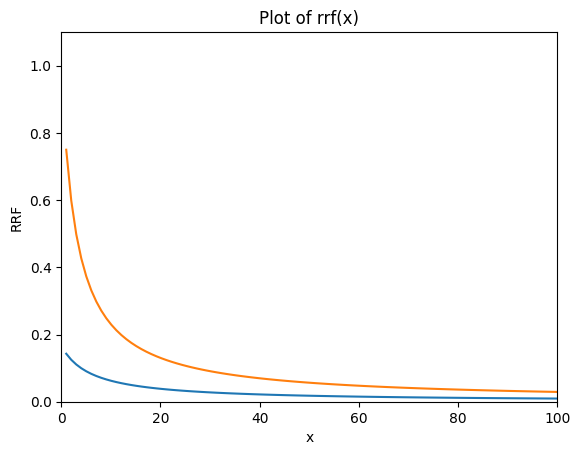

In [70]:
import numpy as np
x = np.linspace(1, 100, 99)  # 100 points from -10 to 10
w1 = 1
k1 = 6
y = w1 / (x + k1)  # Example function
plt.plot(x, y)
w2 = 3
k2 = 3
y = w2 / (x + k2)
plt.plot(x, y)
plt.axis((0.0, 100, 0, 1.1))
plt.xlabel('x')
plt.ylabel('RRF')
plt.title('Plot of rrf(x)')
plt.show()